In [2]:
import pathpy as pp
from scipy.stats import kendalltau
from matplotlib import pyplot as plt
import numpy as np
from scipy.stats import chi2

In [4]:
flights = pp.Paths.read_file('../data/US_flights_train.ngram', frequency=False)
tubes = pp.Paths.read_file('../data/tube_paths_train.ngram', max_subpath_length=5)
#can swap flights for tubes throughout code to run on different dataset
hon_1 = pp.HigherOrderNetwork(flights, k=3)
#pp.visualisation.plot(hon_1)

2020-03-31 06:38:26 [Severity.INFO]	Reading ngram data ... 
2020-03-31 06:38:27 [Severity.INFO]	finished. Read 143405 paths with maximum length 13
2020-03-31 06:38:27 [Severity.INFO]	Calculating sub path statistics ... 
2020-03-31 06:38:28 [Severity.INFO]	finished.
2020-03-31 06:38:28 [Severity.INFO]	Reading ngram data ... 
2020-03-31 06:38:28 [Severity.INFO]	finished. Read 61748 paths with maximum length 35
2020-03-31 06:38:28 [Severity.INFO]	Calculating sub path statistics ... 
2020-03-31 06:38:30 [Severity.INFO]	finished.


In [ ]:
#training_paths = pp.Paths.read_file('../data/US_flights_train.ngram', frequency=False)

hon_1 = pp.HigherOrderNetwork(flights, k=1)
hon_2 = pp.HigherOrderNetwork(flights, k=2)
hon_3 = pp.HigherOrderNetwork(flights, k=3)

pr_1 = pp.algorithms.centralities.pagerank(hon_1)
pr_2 = pp.algorithms.centralities.pagerank(hon_2)
pr_3 = pp.algorithms.centralities.pagerank(hon_3)

# with this, we generate 
pr_1 = [pr_1[v] for v in training_paths.nodes]
pr_2 = [pr_2[v] for v in training_paths.nodes]
pr_3 = [pr_3[v] for v in training_paths.nodes]

In [ ]:
##Validate_Paths??
traversals = pp.algorithms.centralities.node_traversals(#????)
rank_true = [traversals[v] for v in flights.nodes]


In [ ]:
print('tau(pr_1, traversals) = {0}'.format(kendalltau(pr_1, rank_true).correlation))
print('tau(pr_2, traversals) = {0}'.format(kendalltau(pr_2, rank_true).correlation))
print('tau(pr_3, traversals) = {0}'.format(kendalltau(pr_3, rank_true).correlation))

In [12]:
import pathpy as pp
#p = pp.Paths.read_file('../data/US_flights_train.ngram', frequency=False)
p = pp.Paths.read_file('../data/tube_paths_train.ngram', max_subpath_length=2)
hon_1 = pp.HigherOrderNetwork(p, k=1)
hon_2 = pp.HigherOrderNetwork(p, k=2)
hon_3 = pp.HigherOrderNetwork(p, k=3)
hon_4 = pp.HigherOrderNetwork(p, k=4)

#pp.visualisation.plot(hon_1, plot_higher_order_nodes=False)
#pp.visualisation.plot(hon_2, plot_higher_order_nodes=False)
#pp.visualisation.plot(hon_3, plot_higher_order_nodes=False)
#pp.visualisation.plot(hon_4, plot_higher_order_nodes=False)

2020-03-31 06:57:18 [Severity.INFO]	Reading ngram data ... 
2020-03-31 06:57:19 [Severity.INFO]	finished. Read 61748 paths with maximum length 35
2020-03-31 06:57:19 [Severity.INFO]	Calculating sub path statistics ... 
2020-03-31 06:57:20 [Severity.INFO]	finished.


In [ ]:
#flights = pp.Paths.read_file('../data/US_flights_train.ngram', frequency=False)
#tubes = pp.Paths.read_file('../data/tube_paths_train.ngram', max_subpath_length=5)
mog = pp.MultiOrderModel(flights, max_order=2)
print(mog)

pp.visualisation.plot(mog.layers[0])
pp.visualisation.plot(mog.layers[1])
pp.visualisation.plot(mog.layers[2])

In [ ]:
d = mog.degrees_of_freedom(max_order=2) - mog.degrees_of_freedom(max_order=1)
x = - 2 * (mog.likelihood(toy_paths, log=True, max_order=1) - mog.likelihood(toy_paths, log=True, max_order=2))
p = 1 - chi2.cdf(x, d)

print('p value of null hypothesis that data has maximum order 1 = {0}'.format(p))

In [ ]:
mog.estimate_order()

In [ ]:
pp.visualisation.plot(m.layers[1], plot_higher_order_nodes=False)
pp.visualisation.plot(m.layers[2], plot_higher_order_nodes=False)
pp.visualisation.plot(m.layers[3], plot_higher_order_nodes=False)

In [ ]:
pp.visualisation.plot(m, plot_higher_order_nodes=False)

In [3]:
from matplotlib import pyplot as plt
import scipy.stats

def kendalltau(a, b):
    x = []
    y = []
    for v in set(a.keys()).intersection(set(b.keys())):
            x.append(a[v])
            y.append(b[v])
    return scipy.stats.kendalltau(x, y)
def plot_results(res, optimal_order):
    if optimal_order>1:
        diff = res[optimal_order] - res[1]
        print('Relative increase over first-order = {0} %'.format(100*diff/res[1]))
    plt.plot(range(1, max(res.keys())+1), [res[k] for k in range(1, max(res.keys())+1)], '-o')
    plt.plot([optimal_order], [res[optimal_order]], 'g', marker='x', markersize=20.0)
    plt.title('Kendall-Tau')
    plt.xlabel("Order")
    plt.show()

def validate(mog, gt):
    res = {}
    for k in range(1, mog.max_order+1):
        pr = pp.algorithms.centralities.pagerank(mog.layers[k])
        res[k] = kendalltau(gt, pr).correlation
    return res

import json

def read_gt(file):    
    with open(file, 'r') as f:
        return json.load(f)

2020-03-31 08:41:12 [Severity.INFO]	Reading ngram data ... 
2020-03-31 08:41:13 [Severity.INFO]	finished. Read 143405 paths with maximum length 13
2020-03-31 08:41:13 [Severity.INFO]	Calculating sub path statistics ... 
2020-03-31 08:41:13 [Severity.INFO]	finished.
2020-03-31 08:41:13 [Severity.INFO]	Generating 0-th order layer ...
2020-03-31 08:41:13 [Severity.INFO]	Generating 1-th order layer ...
2020-03-31 08:41:13 [Severity.INFO]	Generating 2-th order layer ...
2020-03-31 08:41:16 [Severity.INFO]	Generating 3-th order layer ...
2020-03-31 08:41:20 [Severity.INFO]	Generating 4-th order layer ...
2020-03-31 08:41:33 [Severity.INFO]	finished.
2020-03-31 08:41:42 [Severity.INFO]	Likelihood ratio test for K_opt = 2, x = 344332.415616455
2020-03-31 08:41:42 [Severity.INFO]	Likelihood ratio test, d_1-d_0 = 53684
2020-03-31 08:41:42 [Severity.INFO]	Likelihood ratio test, p = 0.0
2020-03-31 08:41:51 [Severity.INFO]	Likelihood ratio test for K_opt = 3, x = 182955.18802653113
2020-03-31 08:41

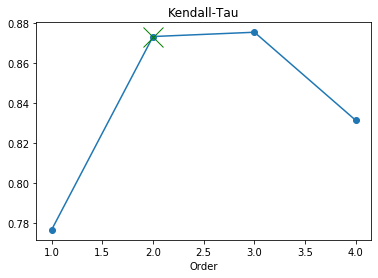

In [5]:
paths = pp.Paths.read_file('../data/US_flights_train.ngram', frequency=False)
gt = read_gt('../data/US_flights_gt.json')

mog = pp.MultiOrderModel(paths, 4)
order = mog.estimate_order()

res = validate(mog, gt)
plot_results(res, order)

2020-03-31 08:51:52 [Severity.INFO]	Reading ngram data ... 
2020-03-31 08:51:53 [Severity.INFO]	finished. Read 61748 paths with maximum length 35
2020-03-31 08:51:53 [Severity.INFO]	Calculating sub path statistics ... 
2020-03-31 08:51:55 [Severity.INFO]	finished.
2020-03-31 08:51:55 [Severity.INFO]	Generating 0-th order layer ...
2020-03-31 08:51:55 [Severity.INFO]	Generating 1-th order layer ...
2020-03-31 08:51:55 [Severity.INFO]	Generating 2-th order layer ...
2020-03-31 08:51:55 [Severity.INFO]	Generating 3-th order layer ...
2020-03-31 08:51:55 [Severity.INFO]	Generating 4-th order layer ...
2020-03-31 08:51:55 [Severity.INFO]	finished.
2020-03-31 08:52:23 [Severity.INFO]	Likelihood ratio test for K_opt = 2, x = 15938589.012705982
2020-03-31 08:52:23 [Severity.INFO]	Likelihood ratio test, d_1-d_0 = 1622
2020-03-31 08:52:23 [Severity.INFO]	Likelihood ratio test, p = 0.0
2020-03-31 08:52:53 [Severity.INFO]	Likelihood ratio test for K_opt = 3, x = 501532.35891006887
2020-03-31 08:52

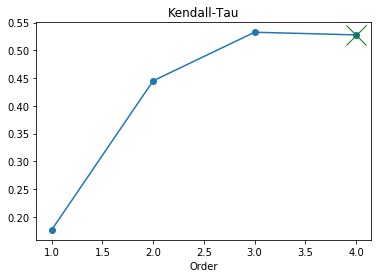

In [9]:
paths = pp.Paths.read_file('../data/tube_paths_train.ngram', max_subpath_length=5)
gt = read_gt('../data/tube_gt.json')

mog = pp.MultiOrderModel(paths, 4)
order = mog.estimate_order()

res = validate(mog, gt)
plot_results(res, order)

2020-03-31 08:54:52 [Severity.INFO]	Reading ngram data ... 
2020-03-31 08:54:52 [Severity.INFO]	finished. Read 143405 paths with maximum length 13
2020-03-31 08:54:52 [Severity.INFO]	Calculating sub path statistics ... 
2020-03-31 08:54:53 [Severity.INFO]	finished.


findfont: Font family ['xkcd', 'xkcd Script', 'Humor Sans', 'Comic Sans MS'] not found. Falling back to DejaVu Sans.
findfont: Font family ['xkcd', 'xkcd Script', 'Humor Sans', 'Comic Sans MS'] not found. Falling back to DejaVu Sans.


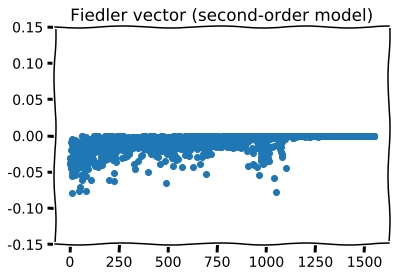

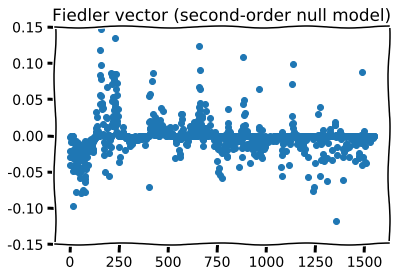

In [10]:
import pathpy as pp
p = pp.Paths.read_file('../data/US_flights_train.ngram', frequency=False)
hon_1 = pp.HigherOrderNetwork(p, k=1)
hon_2 = pp.HigherOrderNetwork(p, k=2)
hon_3 = pp.HigherOrderNetwork(p, k=3)
hon_4 = pp.HigherOrderNetwork(p, k=4)
%matplotlib inline

plt.xkcd()
plt.ylim(-.15, .15)
plt.title('Fiedler vector (second-order model)')
plt.scatter(range(hon_2.ncount()), np.real(pp.algorithms.spectral.fiedler_vector_dense(hon_2)))
plt.show()

plt.title('Fiedler vector (second-order null model)')
plt.ylim(-.15, .15)
plt.scatter(range(hon_2.ncount()), np.real(pp.algorithms.spectral.fiedler_vector_dense(pp.HigherOrderNetwork(p, k=2, null_model=True))))
plt.show()

2020-03-31 08:55:44 [Severity.INFO]	Reading ngram data ... 
2020-03-31 08:55:45 [Severity.INFO]	finished. Read 61748 paths with maximum length 35
2020-03-31 08:55:45 [Severity.INFO]	Calculating sub path statistics ... 
2020-03-31 08:55:47 [Severity.INFO]	finished.


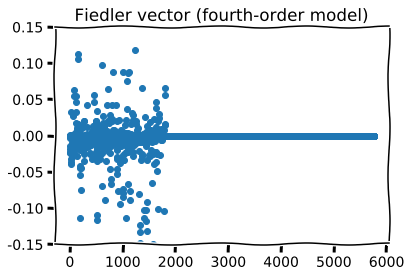

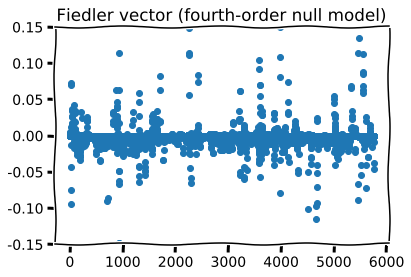

In [11]:
p = pp.Paths.read_file('../data/tube_paths_train.ngram', max_subpath_length=5)
hon_1 = pp.HigherOrderNetwork(p, k=1)
hon_2 = pp.HigherOrderNetwork(p, k=2)
hon_3 = pp.HigherOrderNetwork(p, k=3)
hon_4 = pp.HigherOrderNetwork(p, k=4)
%matplotlib inline

plt.xkcd()
plt.ylim(-.15, .15)
plt.title('Fiedler vector (fourth-order model)')
plt.scatter(range(hon_4.ncount()), np.real(pp.algorithms.spectral.fiedler_vector_dense(hon_4)))
plt.show()

plt.title('Fiedler vector (fourth-order null model)')
plt.ylim(-.15, .15)
plt.scatter(range(hon_4.ncount()), np.real(pp.algorithms.spectral.fiedler_vector_dense(pp.HigherOrderNetwork(p, k=4, null_model=True))))
plt.show()

Fiedler’s Theory of Spectral Graph Partitioning
Brian SliningerDepartment of Computer ScienceUniversity of California, Davis
http://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.592.1730&rep=rep1&type=pdf

Spectral graph partitioning is a method of partitioning a graph into two subgraphs in such a waythat the subgraphs have a nearly equal number of vertices (as close to equal as is possible) whilealso minimizing the number of edges between the two subgraphs.  Thespectrumof a matrix is theset of that matrix’s eigenvalues; therefore, spectral partitioning of a graph uses the eigenvalues ofa matrix associated with the graph to perform the optimal partition.We present the theory and method used by Fiedler to perform a spectral graph partition andrestate the proof of his theorem that the subgraphs generated by a spectral graph partition are, infact, connected